# Regression Model for Wine Quality

## 1. Introduction and Project Aims

This project will look at the physicochemical and sensory variables of red and white wine variants of the Portuguese "Vinho Verde" wine.

It will use the following data to develop a regression model to predict the quality of the wine based on these variables.

  **Data citation:**
  
  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

## 2. The problem

1. Perform any cleaning, feature engineering, and EDA you deem necessary.
2. Addess any missing data.
3. Identify features that can predict quality
4. Train a model on 80% of the data and evaluate its performance on the remaining 20%.
6. Characterise your model. How well does it perform? What are the best estimates of quality?

### 3. Data Processing and Cleaning

Explore the dataset, and check whether any data cleaning is required

In [143]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import logging
from sklearn import linear_model
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels


main_path = Path(r'C:\Users\user\Documents\Data Science Upskilling\Wine Model\Data')
red_wine_data = pd.read_csv(main_path / 'winequality-red.csv', delimiter=';')
white_wine_data = pd.read_csv(main_path / 'winequality-white.csv', delimiter=';')

Exploring the red wine data set

In [104]:
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [105]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


As can be seen all the variables in the dataset are numerical and non-null. No data needs to be removed at this stage. Let's check if there are any duplicates in the dataset.

In [106]:
red_wine_data['duplicated_row'] = red_wine_data.duplicated()
red_wine_data.loc[red_wine_data['duplicated_row']==True].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 4 to 1596
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         240 non-null    float64
 1   volatile acidity      240 non-null    float64
 2   citric acid           240 non-null    float64
 3   residual sugar        240 non-null    float64
 4   chlorides             240 non-null    float64
 5   free sulfur dioxide   240 non-null    float64
 6   total sulfur dioxide  240 non-null    float64
 7   density               240 non-null    float64
 8   pH                    240 non-null    float64
 9   sulphates             240 non-null    float64
 10  alcohol               240 non-null    float64
 11  quality               240 non-null    int64  
 12  duplicated_row        240 non-null    bool   
dtypes: bool(1), float64(11), int64(1)
memory usage: 24.6 KB


As we can see there are 224 duplicated rows. As there is no unique id in the dataset, it is not clear whether these duplicates are by chance and are unique observations or not. For now we will keep them

In [108]:
cleaned_red_wine_data = red_wine_data

### 4. EDA

Let's look at the distribution of the variables.

<function matplotlib.pyplot.show(close=None, block=None)>

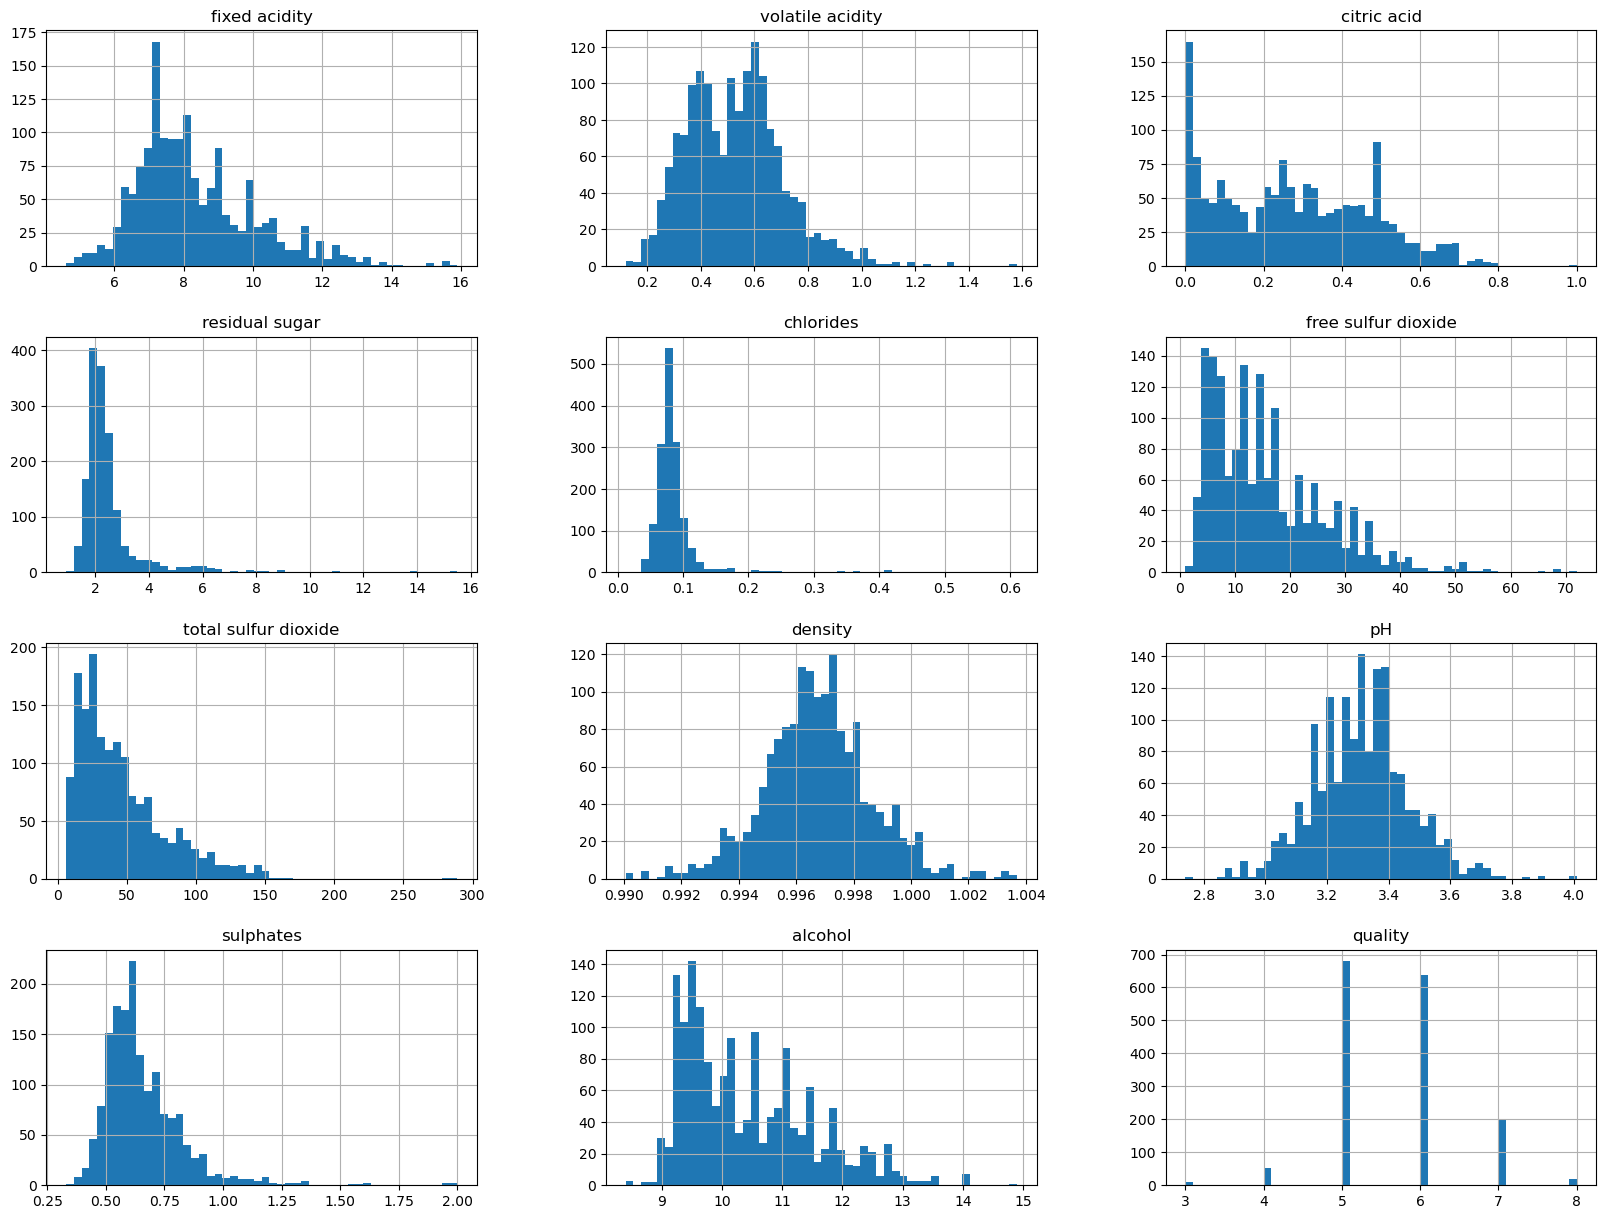

In [109]:
cleaned_red_wine_data.hist(bins=50, figsize=(20,15))
plt.show

A few of the variables are tail heavy and so may need to scale or look at the log of them within the modelling. The quality variables is our dependent variable here, looks like it only ranges from 3-8 and doesn't have an even split across the range. When creating the train test split of the data may need to look at stratified samples so that the model can be trained across the full range of data quality.

Now let's look at the correlation between the variables.

In [110]:
corr_matrix = cleaned_red_wine_data.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
duplicated_row          0.037640
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Can see clearly that the alcohol content of the wine is strongly correlated to the quality, as is the volatie acidity. Let's see a matrix of the correlation across all the other variables

<AxesSubplot:>

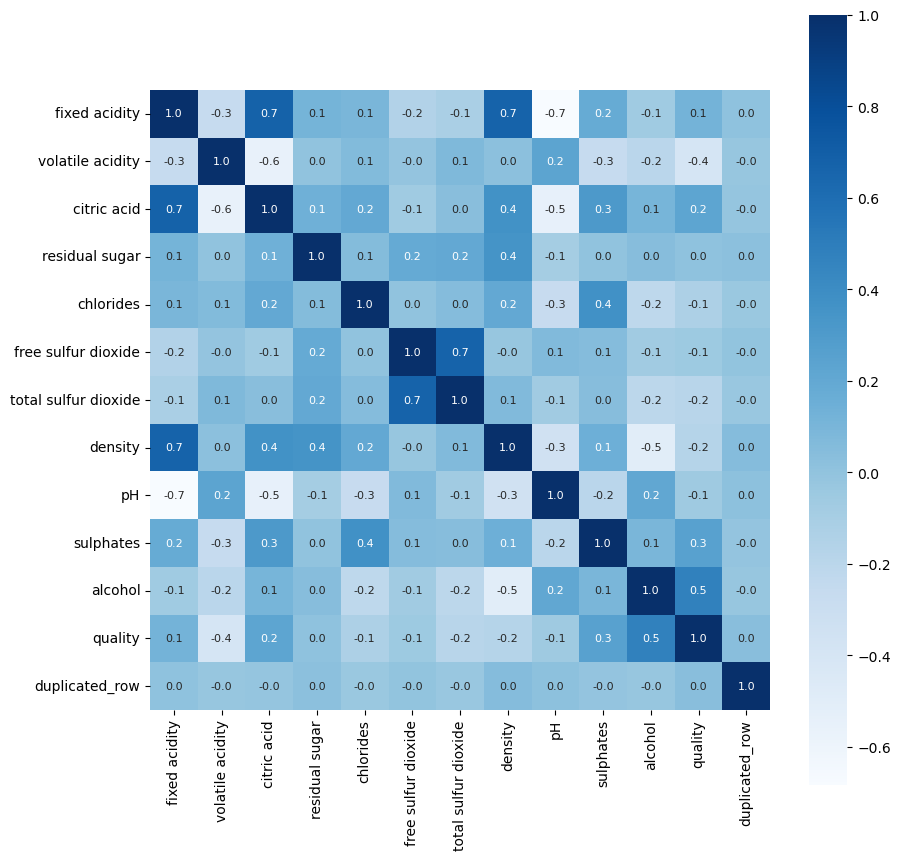

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [112]:
# pd.plotting.scatter_matrix(cleaned_red_wine_data, figsize=(12,8))

As you can see from the histograms above that the alcohol and sulphates variables are tail heavy, so will take the log of these to include in the model.

In [113]:
cleaned_red_wine_data['log_alcohol'] = np.log(cleaned_red_wine_data['alcohol'])
cleaned_red_wine_data['log_sulphates'] = np.log(cleaned_red_wine_data['sulphates'])
cleaned_red_wine_data['log_fixed_acidity'] = np.log(cleaned_red_wine_data['fixed acidity'])
cleaned_red_wine_data['log_chlorides'] = np.log(cleaned_red_wine_data['chlorides'])
cleaned_red_wine_data['log_total sulfur dioxide'] = np.log(cleaned_red_wine_data['total sulfur dioxide'])
cleaned_red_wine_data['log_residual sugar'] = np.log(cleaned_red_wine_data['residual sugar'])
cleaned_red_wine_data['log_volatile acidity'] = np.log(cleaned_red_wine_data['volatile acidity'])
# cleaned_red_wine_data['log_citric acid'] = np.log(cleaned_red_wine_data['citric acid'])
cleaned_red_wine_data['log_free sulfur dioxide'] = np.log(cleaned_red_wine_data['free sulfur dioxide'])

cleaned_red_wine_data.reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,quality,duplicated_row,log_alcohol,log_sulphates,log_fixed_acidity,log_chlorides,log_total sulfur dioxide,log_residual sugar,log_volatile acidity,log_free sulfur dioxide
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,5,False,2.240710,-0.579818,2.001480,-2.577022,3.526361,0.641854,-0.356675,2.397895
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,...,5,False,2.282382,-0.385662,2.054124,-2.322788,4.204693,0.955511,-0.127833,3.218876
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,...,5,False,2.282382,-0.430783,2.054124,-2.385967,3.988984,0.832909,-0.274437,2.708050
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,...,6,False,2.282382,-0.544727,2.415914,-2.590267,4.094345,0.641854,-1.272966,2.833213
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,5,True,2.240710,-0.579818,2.001480,-2.577022,3.526361,0.641854,-0.356675,2.397895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,...,5,False,2.351375,-0.544727,1.824549,-2.407946,3.784190,0.693147,-0.510826,3.465736
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,...,6,False,2.415914,-0.274437,1.774952,-2.780621,3.931826,0.788457,-0.597837,3.663562
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,...,6,True,2.397895,-0.287682,1.840550,-2.577022,3.688879,0.832909,-0.673345,3.367296
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,...,5,False,2.322388,-0.342490,1.774952,-2.590267,3.784190,0.693147,-0.438505,3.465736


<function matplotlib.pyplot.show(close=None, block=None)>

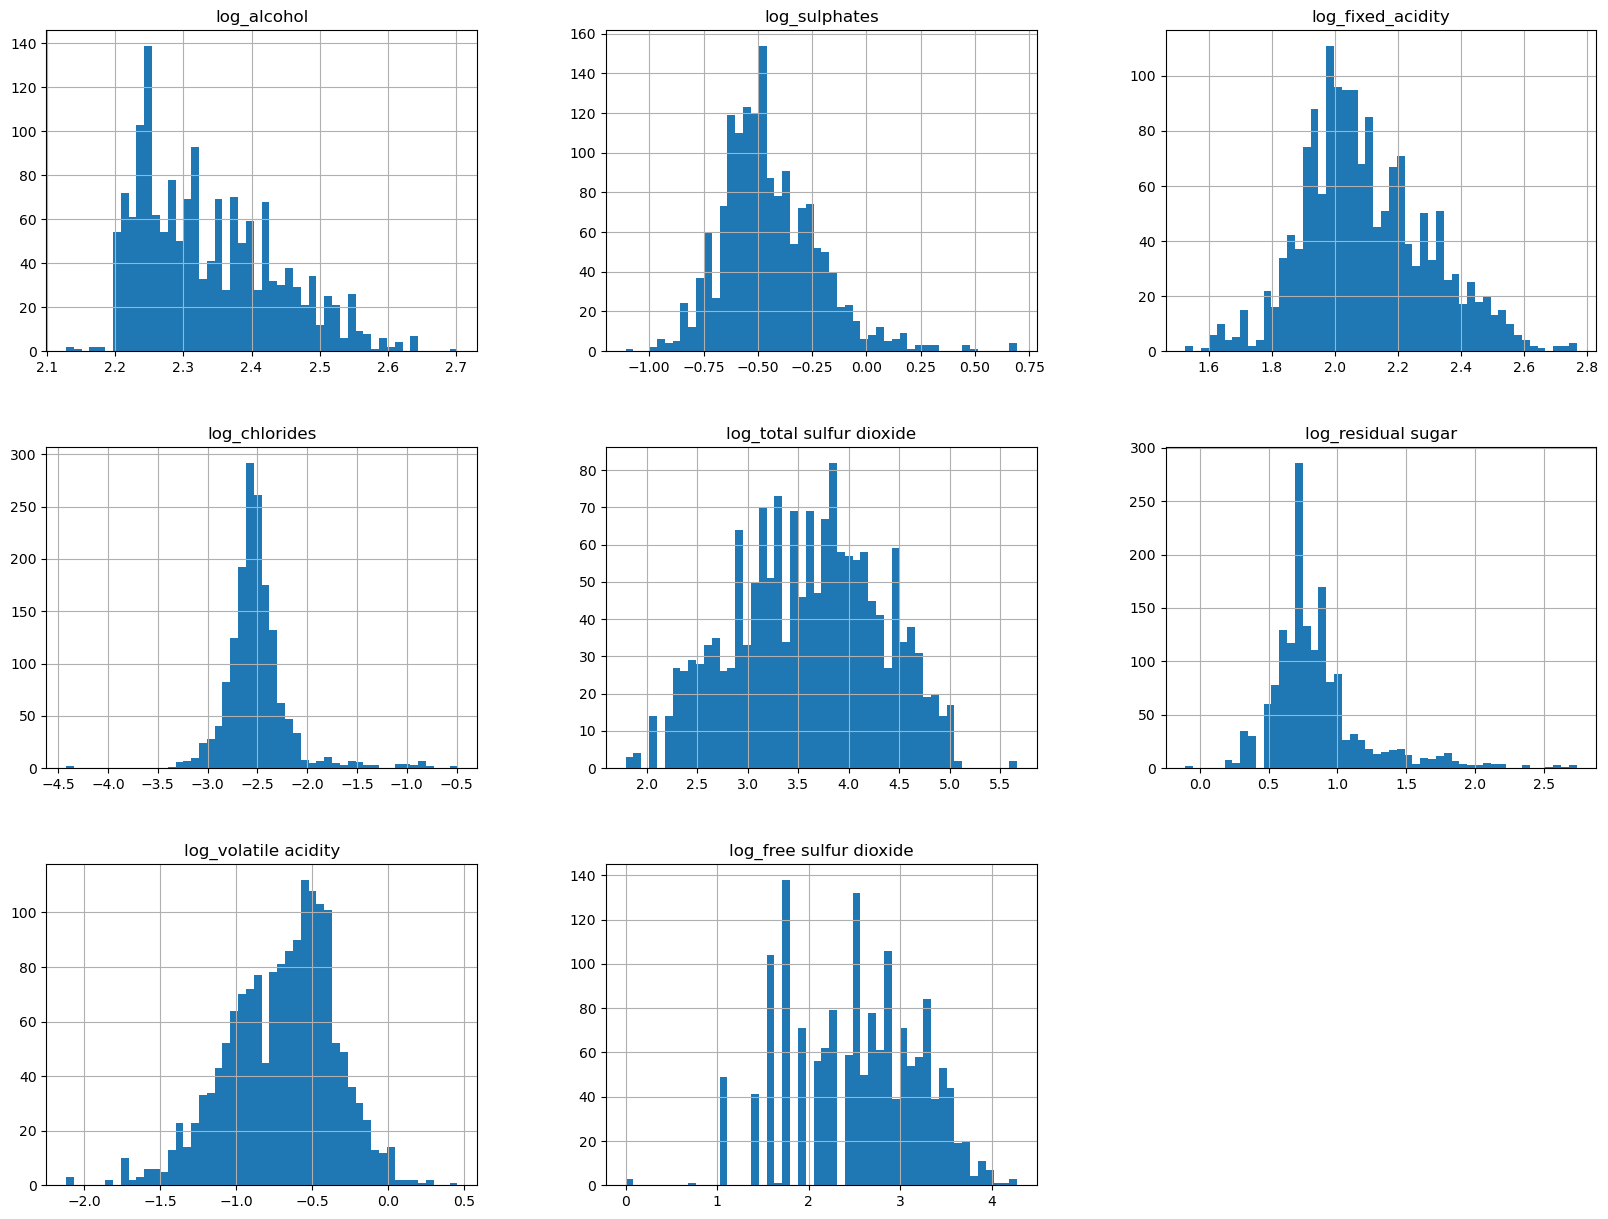

In [114]:
cleaned_red_wine_data[['log_alcohol', 'log_sulphates', 'log_fixed_acidity', 'log_chlorides', 'log_total sulfur dioxide', 'log_residual sugar', 'log_volatile acidity', 'log_free sulfur dioxide']].hist(bins=50, figsize=(20,15))
plt.show

Now they look ready to include in the model.

In [115]:
cleaned_red_wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,quality,duplicated_row,log_alcohol,log_sulphates,log_fixed_acidity,log_chlorides,log_total sulfur dioxide,log_residual sugar,log_volatile acidity,log_free sulfur dioxide
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,5,False,2.240710,-0.579818,2.001480,-2.577022,3.526361,0.641854,-0.356675,2.397895
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,...,5,False,2.282382,-0.385662,2.054124,-2.322788,4.204693,0.955511,-0.127833,3.218876
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,...,5,False,2.282382,-0.430783,2.054124,-2.385967,3.988984,0.832909,-0.274437,2.708050
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,...,6,False,2.282382,-0.544727,2.415914,-2.590267,4.094345,0.641854,-1.272966,2.833213
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,...,5,True,2.240710,-0.579818,2.001480,-2.577022,3.526361,0.641854,-0.356675,2.397895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,...,5,False,2.351375,-0.544727,1.824549,-2.407946,3.784190,0.693147,-0.510826,3.465736
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,...,6,False,2.415914,-0.274437,1.774952,-2.780621,3.931826,0.788457,-0.597837,3.663562
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,...,6,True,2.397895,-0.287682,1.840550,-2.577022,3.688879,0.832909,-0.673345,3.367296
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,...,5,False,2.322388,-0.342490,1.774952,-2.590267,3.784190,0.693147,-0.438505,3.465736


### 5. Model Preparation

Split the data into training and test sets

In [116]:
train_model_1, test_model_1 = train_test_split(cleaned_red_wine_data, test_size=0.2, random_state=42)

Check sample size of each wine category in the test/train datasets

In [141]:
train_model_1.groupby('quality')[['quality']].count()

,quality
quality,
3,9
4,43
5,551
6,506
7,157
8,13


In [140]:
test_model_1.groupby('quality')[['quality']].count()

,quality
quality,
3,1
4,10
5,130
6,132
7,42
8,5


Hmmm think there may be too few data points in the top and bottom categories. The data may need to be aggregated and quality can't be predicted at this disaggregation

 ## Aggregating quality categories to ensure sufficient sample size

In [119]:
cleaned_red_wine_data['quality_aggregated'] = 2
cleaned_red_wine_data.loc[(cleaned_red_wine_data['quality'] == 3) | (cleaned_red_wine_data['quality'] == 4), 'quality_aggregated'] = 1
cleaned_red_wine_data.loc[(cleaned_red_wine_data['quality'] == 7) | (cleaned_red_wine_data['quality'] == 8), 'quality_aggregated'] = 3

In [120]:
train_model_1, test_model_1 = train_test_split(cleaned_red_wine_data, test_size=0.2, random_state=42)

In [139]:
train_model_1.groupby('quality_aggregated')[['quality']].count()

,quality
quality_aggregated,
1,52
2,1057
3,170


In [138]:
test_model_1.groupby('quality_aggregated')[['quality']].count()

,quality
quality_aggregated,
1,11
2,262
3,47


That has improved the sample size. So try the model on quality aggregated

In [123]:
red_wine_modelling_data = train_model_1.drop(columns=['quality_aggregated', 'quality', 'alcohol', 'sulphates', 'fixed acidity', 'chlorides', 'total sulfur dioxide', 'residual sugar', 'free sulfur dioxide', 'volatile acidity']).to_numpy()
red_wine_labels = train_model_1[['quality_aggregated']].to_numpy()

Create the model

In [124]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(red_wine_modelling_data, red_wine_labels)

LinearRegression()

Now let's test it's performance

In [125]:
quality_predictions = lin_reg.predict(test_model_1.drop(columns=['quality_aggregated', 'quality', 'alcohol', 'sulphates', 'fixed acidity', 'chlorides', 'total sulfur dioxide', 'residual sugar', 'free sulfur dioxide', 'volatile acidity']).to_numpy())

lin_mse = mean_squared_error(test_model_1[['quality_aggregated']].to_numpy(), quality_predictions)
lin_rmse = np.sqrt(lin_mse)
r_score = r2_score(test_model_1[['quality_aggregated']].to_numpy(), quality_predictions)
print(f'R^2 score: {r_score}')
print(f'RMSE score: {lin_rmse}')

R^2 score: 0.2861042021389473
RMSE score: 0.34692703796423374


Can see from the above RMSE the model isn't doing badly, but the R^2 is low, now we need to check whether further data cleaning is required, or question whether a linear regression is the right approach. For now lets look to see if there are any outliers.

First check if the model performs better without the logged terms

In [126]:
train_model_1, test_model_1 = train_test_split(cleaned_red_wine_data, test_size=0.2, random_state=42)
red_wine_modelling_data = train_model_1.drop(columns=['quality', 'quality_aggregated', 'log_alcohol', 'log_sulphates', 'log_fixed_acidity', 'log_chlorides', 'log_total sulfur dioxide', 'log_residual sugar', 'log_volatile acidity', 'log_free sulfur dioxide']).to_numpy()
red_wine_labels = train_model_1[['quality_aggregated']].to_numpy()

lin_reg = linear_model.LinearRegression(fit_intercept=True)
lin_reg.fit(red_wine_modelling_data, red_wine_labels)

quality_predictions = lin_reg.predict(test_model_1.drop(columns=['quality', 'quality_aggregated', 'log_alcohol', 'log_sulphates', 'log_fixed_acidity', 'log_chlorides', 'log_total sulfur dioxide', 'log_residual sugar', 'log_volatile acidity', 'log_free sulfur dioxide']).to_numpy())

lin_mse = mean_squared_error(test_model_1[['quality_aggregated']].to_numpy(), quality_predictions)
lin_rmse = np.sqrt(lin_mse)
r_score = r2_score(test_model_1[['quality_aggregated']].to_numpy(), quality_predictions)
print(f'R^2 score: {r_score}')
print(f'RMSE score: {lin_rmse}')

R^2 score: 0.2840318361059657
RMSE score: 0.34743021980177524


The model definitely performs better with the logged terms, just... Now let's check for data outliers

Given the model doesn't perform much better when the data has been transformed to log, and the original data aren't normally distributed maybe Linear Regression isn't the best model form for this data.

### 6. Extra Data Cleaning

Let's see if there are any outliers when comparing the independent variables against the dependent variable

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

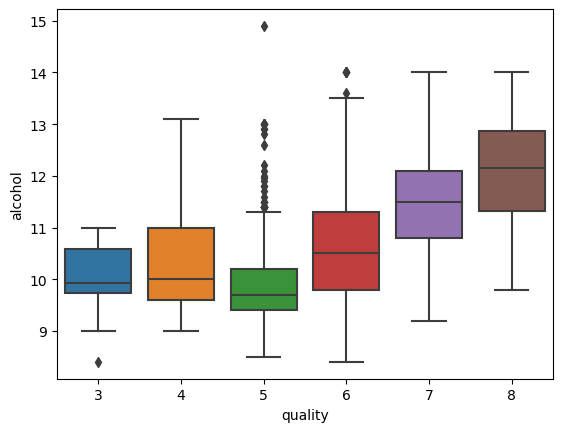

In [127]:
# Quality vs alcohol
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='alcohol')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

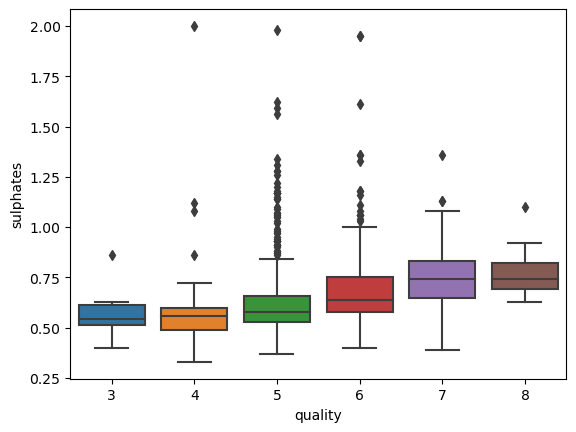

In [128]:
# Quality vs sulphates
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='sulphates')

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

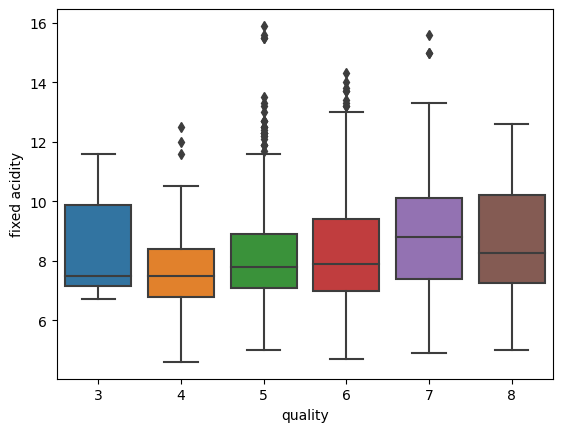

In [129]:
# Quality vs fixed acidity
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='fixed acidity')

<AxesSubplot:xlabel='quality', ylabel='log_chlorides'>

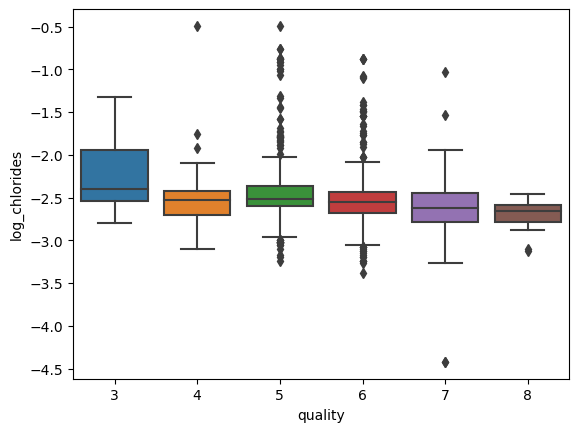

In [130]:
# Quality vs chlorides
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='log_chlorides')

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

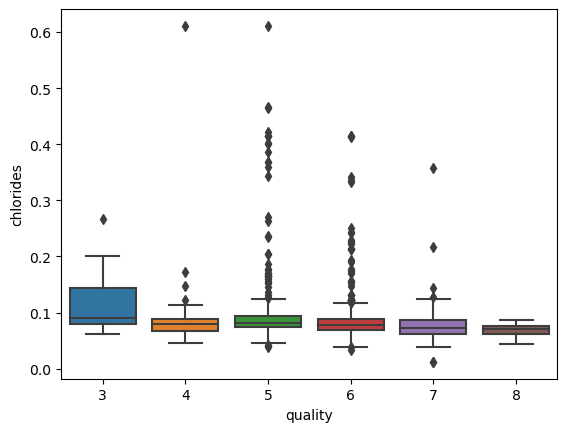

In [131]:
# Quality vs total sulfur dioxide
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='chlorides')

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

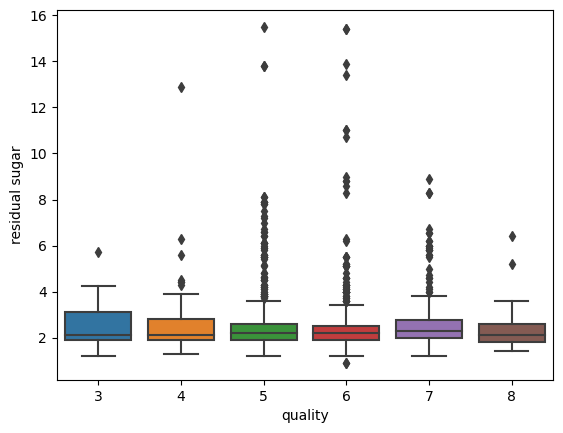

In [132]:
# Quality vs residual sugar
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='residual sugar')

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

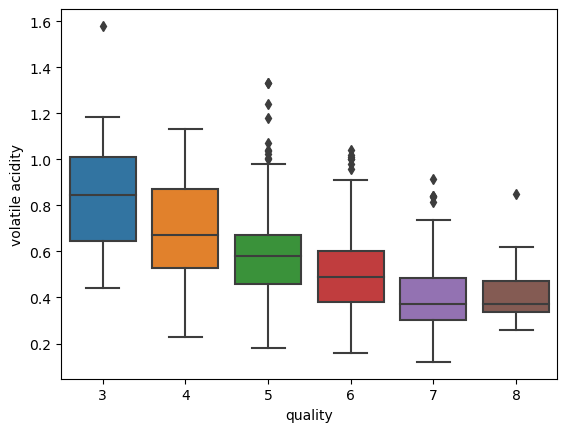

In [133]:
# Quality vs volatile acidity 
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='volatile acidity')

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

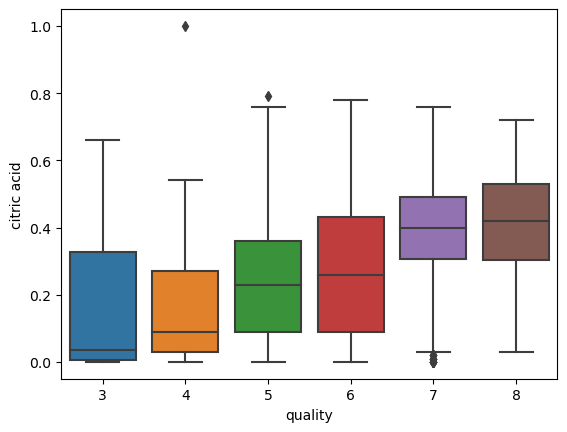

In [134]:
# Quality vs citric acid  
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='citric acid')

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

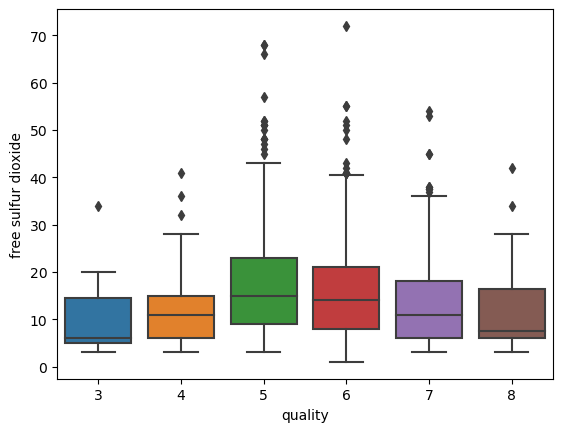

In [135]:
# Quality vs free sulfur dioxide
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='free sulfur dioxide')

<AxesSubplot:xlabel='quality', ylabel='density'>

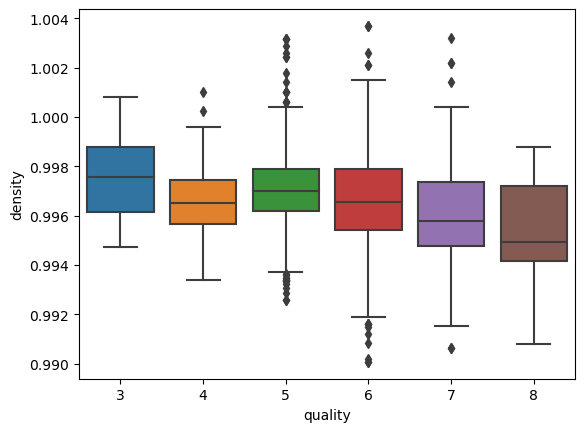

In [136]:
# Quality vs density
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='density')

<AxesSubplot:xlabel='quality', ylabel='pH'>

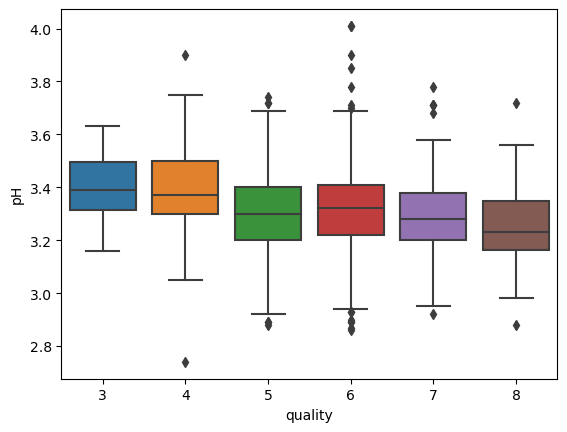

In [137]:
# Quality vs pH
sns.boxplot(data=cleaned_red_wine_data, x='quality', y='pH')

Looking at the description of the dataset above in section 3, and the above distributions the following variables show outliers and require data cleaning:

1. volatile acidity	
2. citric acid	
3. residual sugar	
4. chlorides	
5. free sulfur dioxide	
6. total sulfur dioxide
7. sulphates

Not:
1. Density
2. Fixed Acidity
3. Alcohol
4. pH

In [142]:
cleaned_red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,quality,log_alcohol,log_sulphates,log_fixed_acidity,log_chlorides,log_total sulfur dioxide,log_residual sugar,log_volatile acidity,log_free sulfur dioxide,quality_aggregated
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,...,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,...,5.636023,2.339021,-0.445260,2.098226,-2.505462,3.600721,0.850232,-0.698517,2.546132,2.096310
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,...,0.807569,0.098899,0.223566,0.199412,0.327215,0.705393,0.357443,0.353683,0.685292,0.407354
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,...,3.000000,2.128232,-1.108663,1.526056,-4.422849,1.791759,-0.105361,-2.120264,0.000000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,...,5.000000,2.251292,-0.597837,1.960095,-2.659260,3.091042,0.641854,-0.941609,1.945910,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,...,6.000000,2.322388,-0.478036,2.066863,-2.538307,3.637586,0.788457,-0.653926,2.639057,2.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,...,6.000000,2.406945,-0.314711,2.219203,-2.407946,4.127134,0.955511,-0.446287,3.044522,2.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,...,8.000000,2.701361,0.693147,2.766319,-0.492658,5.666427,2.740840,0.457425,4.276666,3.000000


To be safe will run data cleaning across all variables, as the data aren't normally distributed will use the IQR method.

In [144]:
def remove_outlier_Hampel(df):
    med=df.median()
    List=abs(df-med)
    cond=List.median()*4.5
    good_list=List[~(List>cond)]
    return good_list

In [152]:
outlier_removal = pd.DataFrame(data={'alcohol':remove_outlier_Hampel(cleaned_red_wine_data.alcohol)})


<AxesSubplot:>

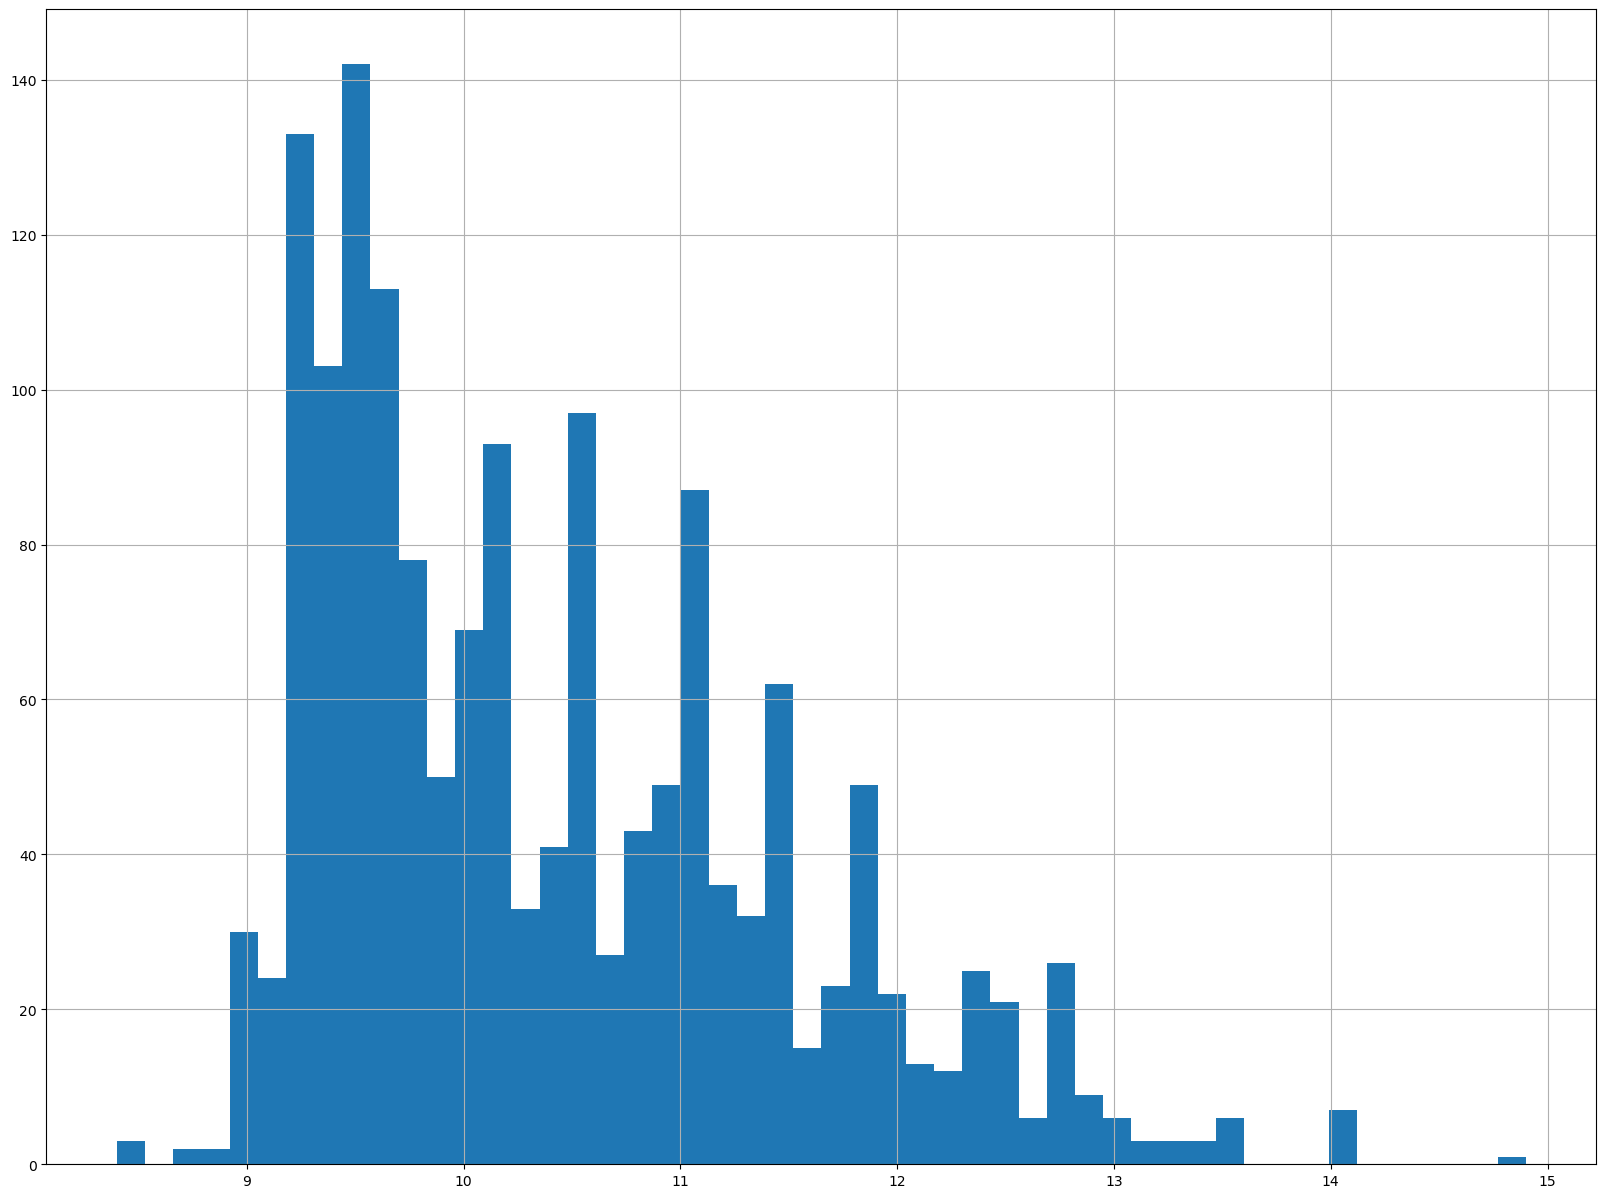

In [153]:
cleaned_red_wine_data.alcohol.hist(bins=50, figsize=(20,15))

<AxesSubplot:>

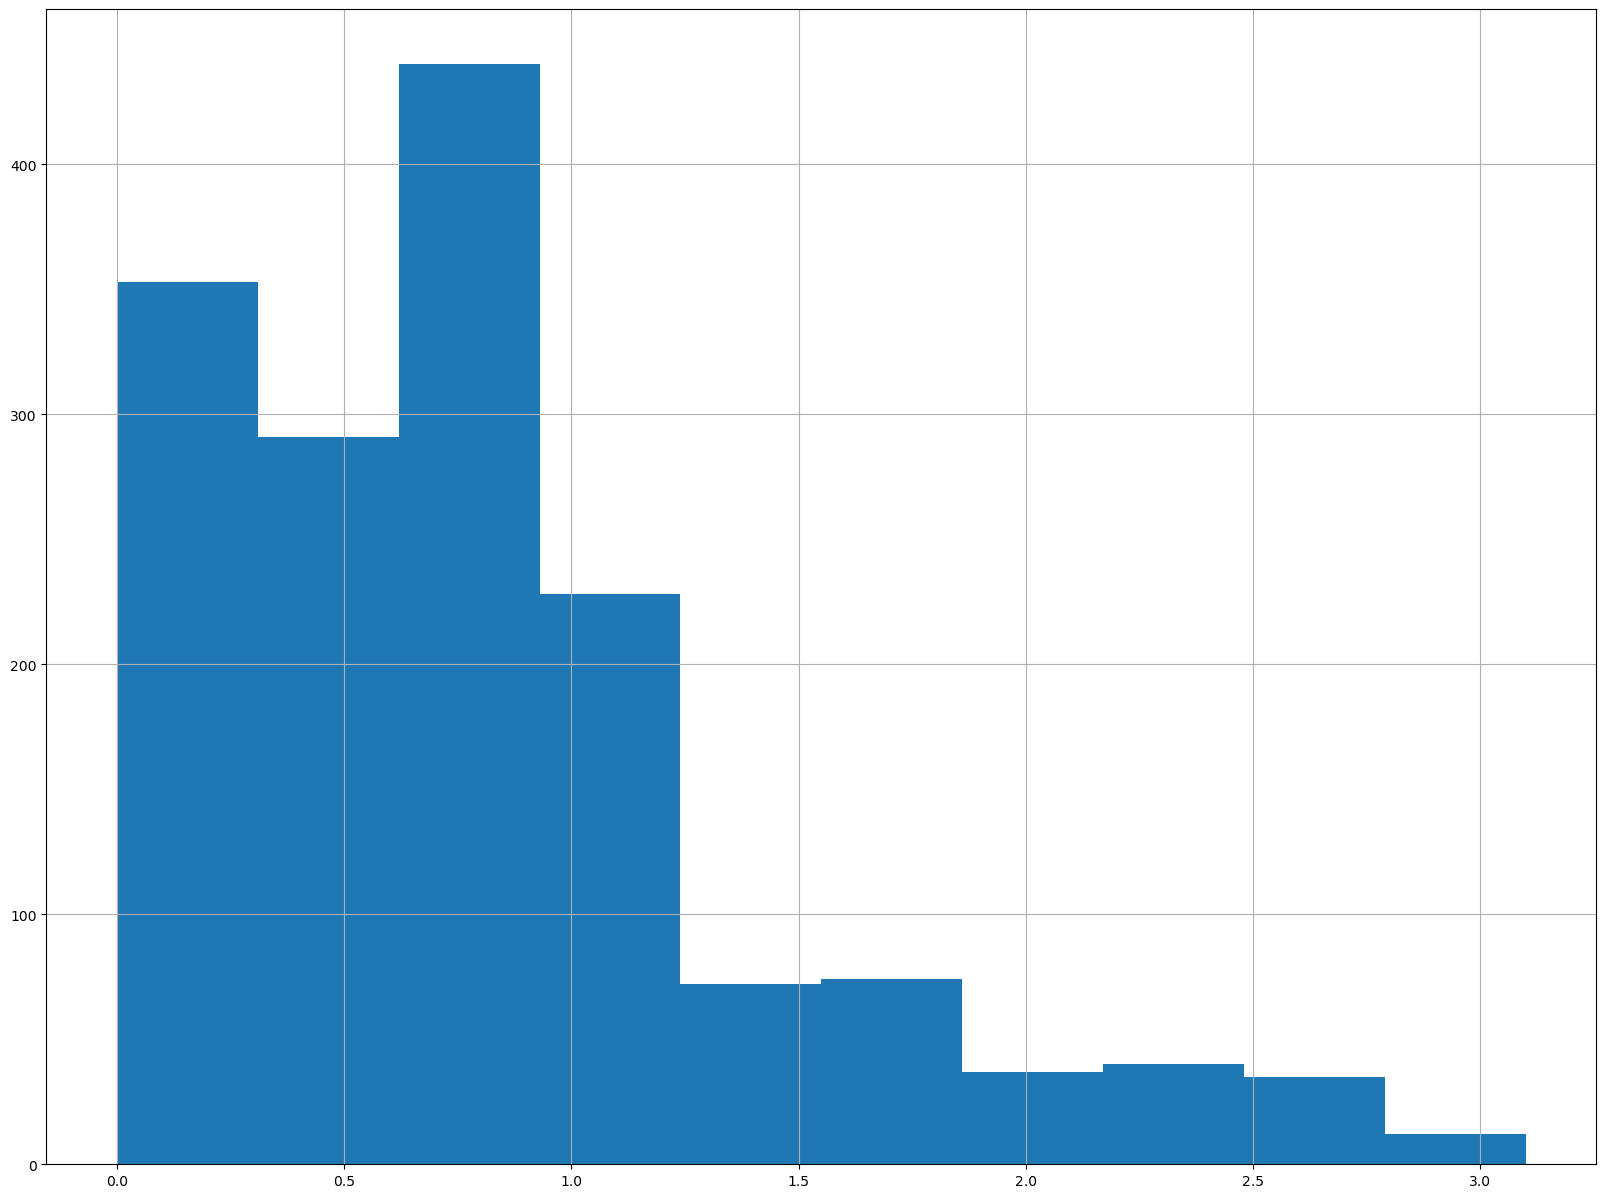

In [155]:
outlier_removal.alcohol.hist(bins=10, figsize=(20,15))